Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPool2D
from glob import glob
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization

In [8]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/CNN/data/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN/data/Test')

In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    label_mode='categorical',
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    label_mode='categorical',
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

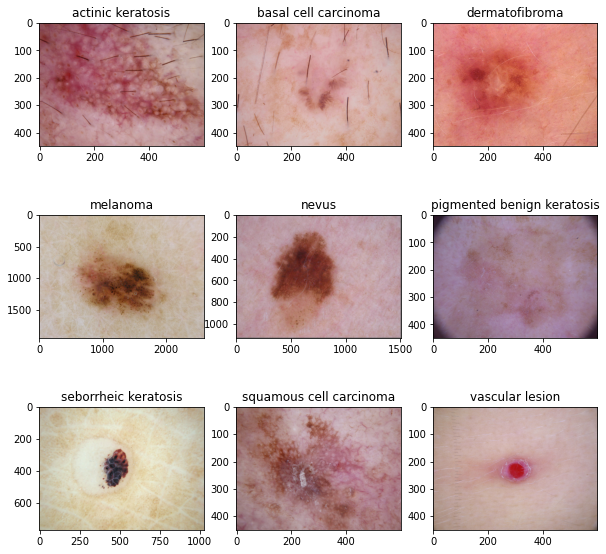

In [15]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(len(class_names)): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)   

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
### Your code goes here
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units = num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD( learning_rate=0.001,name="SGD",nesterov=False),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0

### Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 253s 765ms/step - loss: 2.0880 - accuracy: 0.1903 - val_loss: 2.0350 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 49ms/step - loss: 2.0248 - accuracy: 0.2188 - val_loss: 2.0262 - val_accuracy: 0.1857
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0189 - accuracy: 0.2132 - val_loss: 2.0183 - val_accuracy: 0.2237
Epoch 4/20
56/56 [==============================] - 3s 47ms/step - loss: 2.0147 - accuracy: 0.2288 - val_loss: 2.0168 - val_accuracy: 0.2483
Epoch 5/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0104 - accuracy: 0.2221 - val_loss: 2.0180 - val_accuracy: 0.1812
Epoch 6/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0084 - accuracy: 0.2193 - val_loss: 2.0091 - val_accuracy: 0.2237
Epoch 7/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0046 - accuracy: 0.2360 - val_loss: 2.0061 - val_accuracy: 0.2148
Epoch 8/20

### Visualizing training results

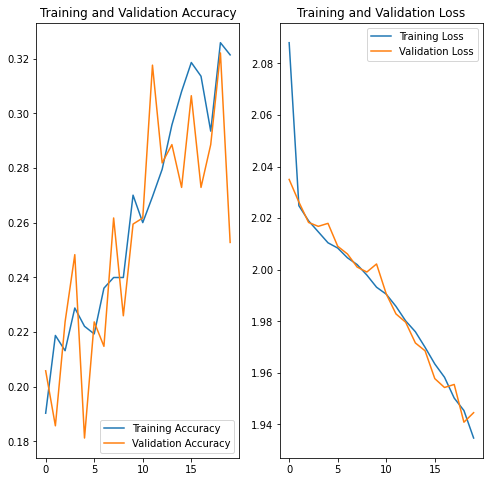

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<b><u>Observations:</b></u>
- Performance of the model is not very good with the SGD optimizer. Able to achieve only 25% accuracy in training.
- Let us try with different optimizer, this time with adam optimizer.

In [22]:
### Your code goes here
num_classes = 9
model2 = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))



model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(units = num_classes, activation = "softmax"))



In [23]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
epochs=20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 53ms/step - loss: 2.0006 - accuracy: 0.2617 - val_loss: 1.8822 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5928 - accuracy: 0.4565 - val_loss: 1.5120 - val_accuracy: 0.4743
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.4896 - accuracy: 0.4866 - val_loss: 1.4330 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 1.3544 - accuracy: 0.5229 - val_loss: 1.4348 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 3s 48ms/step - loss: 1.2878 - accuracy: 0.5508 - val_loss: 1.4407 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 3s 48ms/step - loss: 1.2626 - accuracy: 0.5446 - val_loss: 1.4589 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 3s 48ms/step - loss: 1.1509 - accuracy: 0.5932 - val_loss: 1.5240 - val_accuracy: 0.4989
Epoch 8/20
56

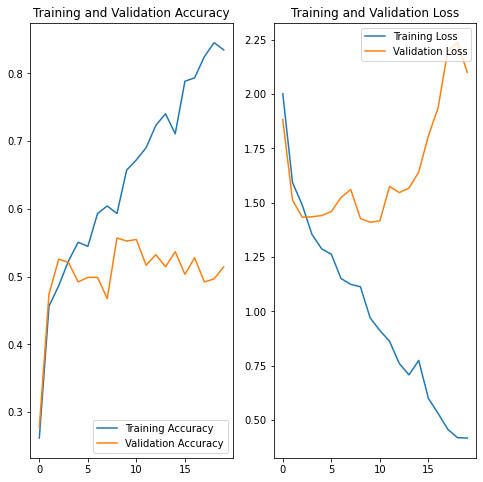

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

<b><u>Observations:</b></u>
- By selecting adam optimizer, we have improved the tranining and validation accuracy.
- However, there is evidence of overfitting since accuracy on training set is way higher than validation set. 


In [26]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here.
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

<Figure size 864x864 with 0 Axes>

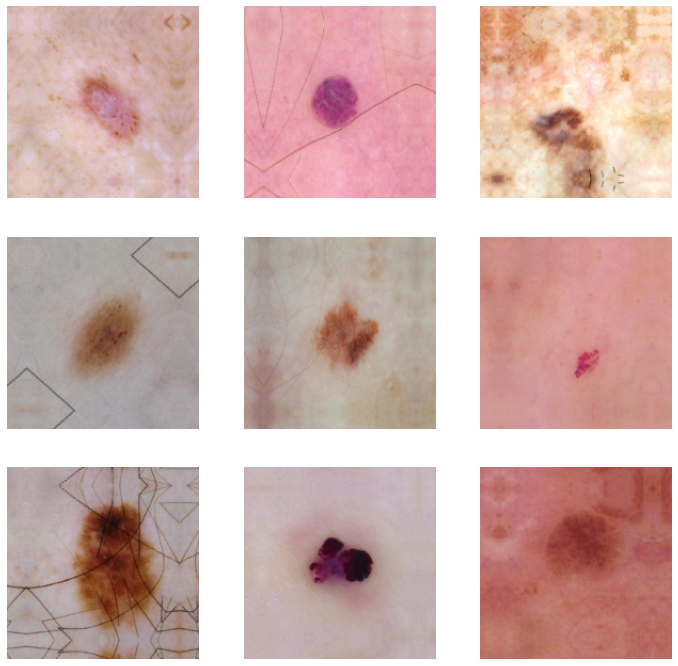

In [27]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [28]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
num_classes = 9

model3 = Sequential([data_aug,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [29]:
## Your code goes here
model3.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

### Training the model

In [30]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 5s 66ms/step - loss: 2.1132 - accuracy: 0.1875 - val_loss: 2.0763 - val_accuracy: 0.2729
Epoch 2/20
56/56 [==============================] - 3s 62ms/step - loss: 2.0068 - accuracy: 0.2433 - val_loss: 1.9100 - val_accuracy: 0.3669
Epoch 3/20
56/56 [==============================] - 3s 61ms/step - loss: 1.8371 - accuracy: 0.3248 - val_loss: 1.7834 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 1.7233 - accuracy: 0.3862 - val_loss: 1.6975 - val_accuracy: 0.4027
Epoch 5/20
56/56 [==============================] - 3s 61ms/step - loss: 1.7018 - accuracy: 0.3895 - val_loss: 1.6977 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 3s 61ms/step - loss: 1.6066 - accuracy: 0.4381 - val_loss: 1.5066 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.5364 - accuracy: 0.4581 - val_loss: 1.4584 - val_accuracy: 0.4899
Epoch 8/20
56

### Visualizing the results

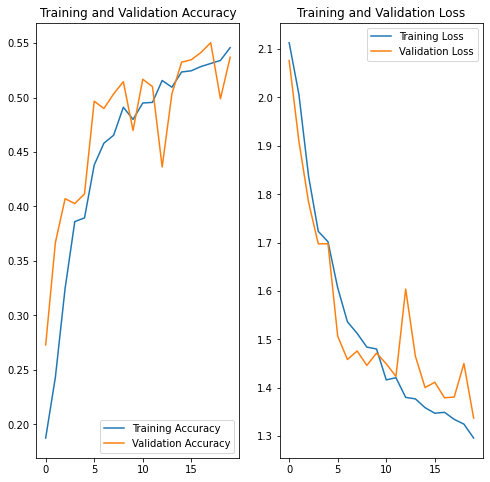

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


<b><u>Observations:</b></u>
- There is improvement in the model performance stability between training and validation steps.
- Although model accuracy has reduced a bit, the variance between training and validation datasets has reduced.
- This proves that adding dropouts  has helped in fixing the overfitting problem to some extent.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

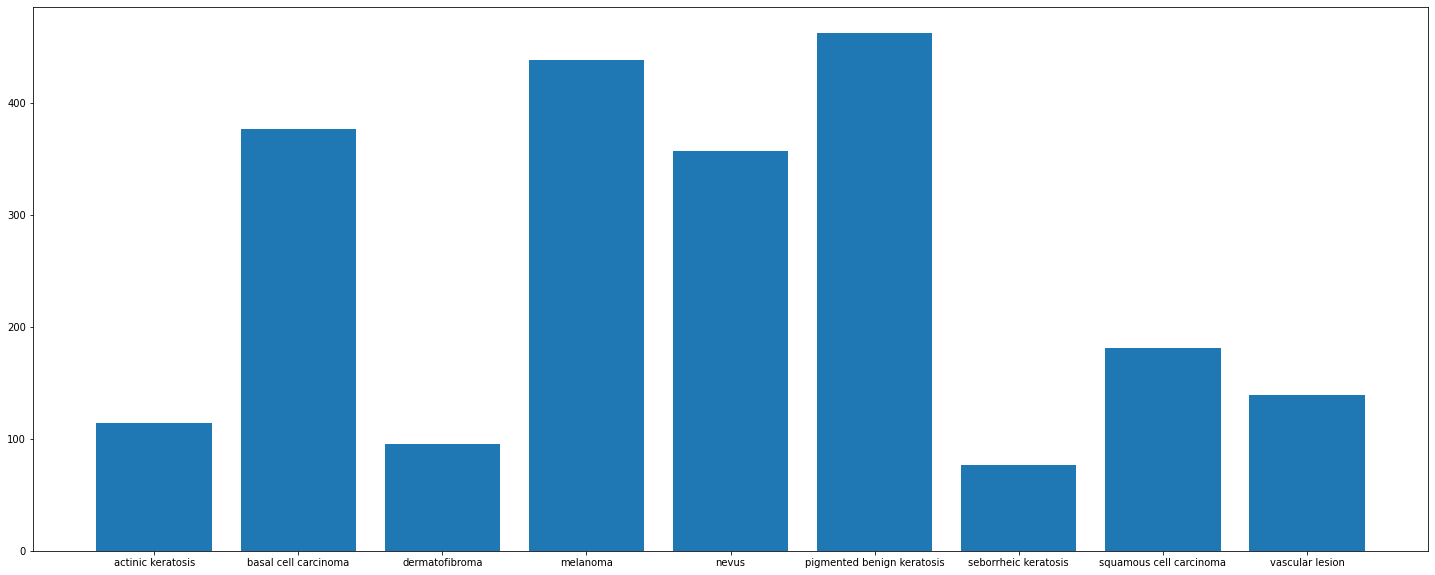

In [32]:
## Your code goes here.
count=[]
plt.figure(figsize=(25,10))
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))

plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
##### <b>As can be seen from the above graph, there is class imbalance across the 9 classes </b>
#### - Which class has the least number of samples?
###### <b>seborrheic keratosis has least number of samples.</b>
#### - Which classes dominate the data in terms proportionate number of samples?
######  <b>The below classes dominate the data in terms of number of samples 



1.  pigmented benign Keratosis
2.  melanoma
3.  basal cell carcinoma
4.  nevus
</b>

.       
.       
        
        

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN/data/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F006646A5D0>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F00664594D0>: 100%|██████████| 500/500 [00:22<00:00, 22.25 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00661B4F10>: 100%|██████████| 500/500 [00:23<00:00, 21.72 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1936x1936 at 0x7F00669900D0>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F00660A9550>: 100%|██████████| 500/500 [01:43<00:00,  4.83 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0066490ED0>: 100%|██████████| 500/500 [00:23<00:00, 21.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F006607BF50>: 100%|██████████| 500/500 [00:52<00:00,  9.53 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00661E26D0>: 100%|██████████| 500/500 [00:24<00:00, 20.04 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/data/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00E045D3D0>: 100%|██████████| 500/500 [00:24<00:00, 20.27 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0031041.jpg_57075bb1-e727-478e-9ebd-b063567cf603.jpg',
 '/content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030249.jpg_fa718ed9-24b6-4989-a3dd-d5f255f7e5ed.jpg',
 '/content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025513.jpg_688d9c7f-1e20-490c-a4f7-3f10d79e3812.jpg',
 '/content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030813.jpg_d15a68b9-42c3-4293-bb0a-0028b71fbf4d.jpg',
 '/content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029342.jpg_cf1bdf8a-9d59-43d8-8eee-de781110275f.jpg',
 '/content/gdrive/MyDrive/CNN/data/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025826.jpg_de4f89d5-b6ad-49de-9663-fb7f376e4632.jpg',
 '/content/gdrive/MyDrive/CNN/data/Train/basal

In [38]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [39]:
dataframe_dict = dict(zip(path_list, lesion_list))
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))


In [40]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns=['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [41]:
new_df['Label'].value_counts()

Train                         2239
pigmented benign keratosis     500
melanoma                       500
nevus                          500
vascular lesion                500
seborrheic keratosis           500
dermatofibroma                 500
basal cell carcinoma           500
actinic keratosis              500
squamous cell carcinoma        500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
data_dir_train="/content/gdrive/MyDrive/CNN/data/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [57]:
## your code goes here
num_classes = 9

model4 = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model4.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))

model4.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))

model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))


model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))
model4.add(Dense(num_classes, activation = "softmax"))



In [58]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 90, 90, 32)        128       
_________________________________________________________________
dropout_20 (Dropout)         (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 45, 45, 32)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [59]:
## your code goes here
model4.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [60]:
epochs = 30
## Your code goes here, use 50 epochs.


history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)                      


Epoch 1/30
169/169 [==============================] - 42s 232ms/step - loss: 1.9737 - accuracy: 0.3166 - val_loss: 2.6117 - val_accuracy: 0.1166
Epoch 2/30
169/169 [==============================] - 40s 230ms/step - loss: 1.5106 - accuracy: 0.4514 - val_loss: 2.8425 - val_accuracy: 0.1507
Epoch 3/30
169/169 [==============================] - 40s 232ms/step - loss: 1.3465 - accuracy: 0.5165 - val_loss: 2.3959 - val_accuracy: 0.2435
Epoch 4/30
169/169 [==============================] - 40s 232ms/step - loss: 1.1868 - accuracy: 0.5686 - val_loss: 1.8794 - val_accuracy: 0.3667
Epoch 5/30
169/169 [==============================] - 40s 231ms/step - loss: 1.0869 - accuracy: 0.6094 - val_loss: 1.4835 - val_accuracy: 0.5241
Epoch 6/30
169/169 [==============================] - 40s 231ms/step - loss: 0.9665 - accuracy: 0.6504 - val_loss: 1.4641 - val_accuracy: 0.4878
Epoch 7/30
169/169 [==============================] - 40s 230ms/step - loss: 0.8552 - accuracy: 0.6960 - val_loss: 1.2042 - val_ac

#### **Todo:**  Visualize the model results


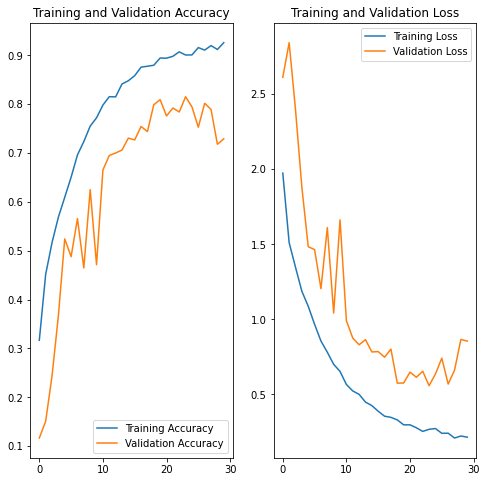

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



<b><u> Observations:</b></u>
- Class rebalancing helped a lot in avoiding the overfitting problem. 
- Class imbalance could cause predicting classes with higher samples to be predicted more often. That problem is avoided by class rebalance using 
  data augmentation strategies.